In [ ]:
"""
TO BE ADDED:

- CV
- GridSearchCV

"""


# Data wrangling libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Regression libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [2]:
df = pd.read_csv("data_cleaned.csv")
df = df.drop(columns=['type', 'buildingcondition', 'epcscore', 'region', 'province', 'locality', 'postcode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38701 entries, 0 to 38700
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedroomcount               38701 non-null  float64
 1   habitablesurface           38701 non-null  float64
 2   haslift                    38701 non-null  int64  
 3   hasgarden                  38701 non-null  int64  
 4   hasswimmingpool            38701 non-null  int64  
 5   hasterrace                 38701 non-null  int64  
 6   price                      38701 non-null  float64
 7   epcscore_encoded           38701 non-null  float64
 8   buildingcondition_encoded  38701 non-null  float64
 9   region_Brussels            38701 non-null  float64
 10  region_Flanders            38701 non-null  float64
 11  region_Wallonia            38701 non-null  float64
 12  type_encoded               38701 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.8 MB


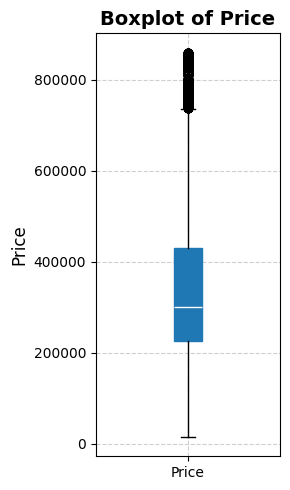

In [3]:
target = 'price'

import matplotlib.pyplot as plt

plt.figure(figsize=(3, 5))
plt.boxplot(df[target], patch_artist=True, boxprops=dict(facecolor='#1f77b4', color='#1f77b4'),
            medianprops=dict(color='white'))

plt.title(f'Boxplot of {target.capitalize()}', fontsize=14, fontweight='bold')
plt.ylabel(target.capitalize(), fontsize=12)
plt.xticks([1], [target.capitalize()])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
def scaleDF(df, target):
    features = df.drop(columns=[target])
    target_col = df[target]

    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(features)

    df_scaled = pd.DataFrame(x_scaled, columns=features.columns, index=df.index)
    df_scaled[target] = target_col  # Add target column back without scaling

    return df_scaled


In [5]:
def splitDF(df, target):
    X = df.drop(target, axis=1).values
    y = df[target].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    return X_train, X_test, y_train, y_test


In [6]:
df = scaleDF(df, target)
X_train, X_test, y_train, y_test = splitDF(df, target)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedroomcount,38701.0,0.030092,0.022085,0.0,0.016129,0.032258,0.048387,1.0
habitablesurface,38701.0,0.002332,0.005656,0.0,0.001323,0.001969,0.002831,1.0
haslift,38701.0,0.242991,0.428895,0.0,0.000000,0.000000,0.000000,1.0
hasgarden,38701.0,0.244128,0.429575,0.0,0.000000,0.000000,0.000000,1.0
hasswimmingpool,38701.0,0.017183,0.129955,0.0,0.000000,0.000000,0.000000,1.0
hasterrace,38701.0,0.668122,0.470893,0.0,0.000000,1.000000,1.000000,1.0
epcscore_encoded,38701.0,0.564637,0.232588,0.0,0.375000,0.500000,0.750000,1.0
buildingcondition_encoded,38701.0,0.368445,0.264344,0.0,0.200000,0.400000,0.600000,1.0
region_Brussels,38701.0,0.113718,0.317473,0.0,0.000000,0.000000,0.000000,1.0
region_Flanders,38701.0,0.589416,0.491946,0.0,0.000000,1.000000,1.000000,1.0


In [7]:
def regResults(y_test, y_pred):
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"📊 Linear Regression Results:")
    print(f"MAE  (Mean Absolute Error)     : {mae:.2f}")
    print(f"MSE  (Mean Squared Error)      : {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error) : {rmse:.2f}")
    print(f"R²   (R-squared)                : {r2:.3f}")

# LINEAR REGRESSION

In [8]:
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 92973.65
MSE  (Mean Squared Error)      : 27973714603.22
RMSE (Root Mean Squared Error) : 167253.44
R²   (R-squared)                : -0.018


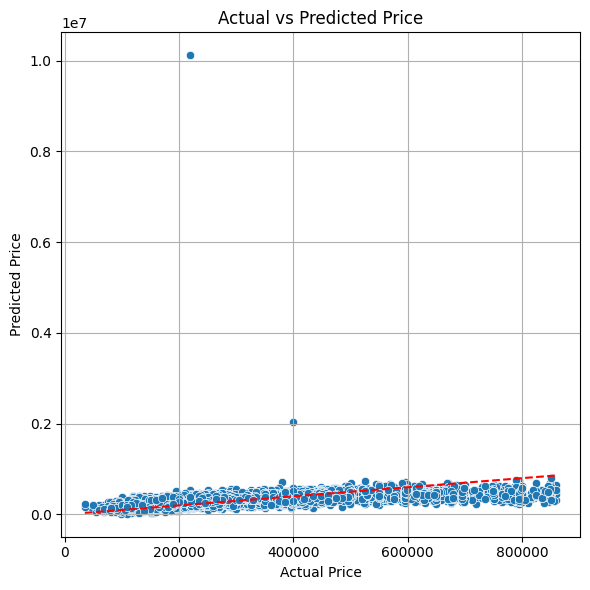

In [9]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Ideal line
plt.grid(True)
plt.tight_layout()
plt.show()


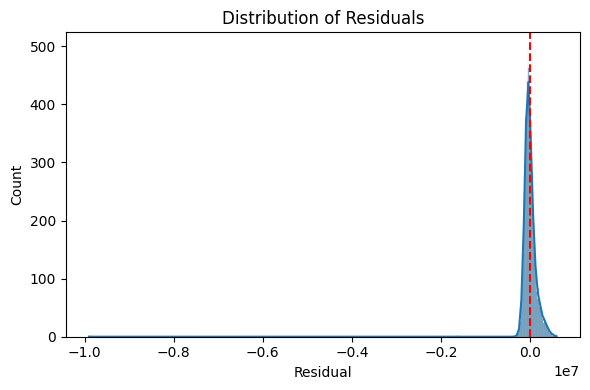

In [10]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()


In [11]:
# Lasso
modelLASSO = Lasso(alpha=0.0005, random_state=123)
modelLASSO.fit(X_train, y_train)

y_pred = modelLASSO.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 92973.66
MSE  (Mean Squared Error)      : 27973486771.50
RMSE (Root Mean Squared Error) : 167252.76
R²   (R-squared)                : -0.018


In [12]:
# Ridge
modelRIDGE = Ridge(alpha=0.002, random_state=123)

modelRIDGE.fit(X_train, y_train)

y_pred = modelRIDGE.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 92983.73
MSE  (Mean Squared Error)      : 27679825923.92
RMSE (Root Mean Squared Error) : 166372.55
R²   (R-squared)                : -0.008


In [13]:
# ElasticNet = Lasso (L1) + Ridge (L2)
# It combines the strengths of both:

modelEnet = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)

modelEnet.fit(X_train, y_train)

y_pred = modelEnet.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 104422.26
MSE  (Mean Squared Error)      : 19070927138.33
RMSE (Root Mean Squared Error) : 138097.53
R²   (R-squared)                : 0.306


# XGBOOST

In [14]:
modelXGB = XGBRegressor(random_state=123)
modelXGB.fit(X_train, y_train)

y_pred = modelXGB.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 80802.20
MSE  (Mean Squared Error)      : 12117593669.53
RMSE (Root Mean Squared Error) : 110079.94
R²   (R-squared)                : 0.559


In [15]:
# n_estimators specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
# Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
# Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

# early_stopping_rounds offers a way to automatically find the ideal value for n_estimators. 
# Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. 
# Setting early_stopping_rounds=5 is a reasonable choice. 
# In this case, we stop after 5 straight rounds of deteriorating validation scores.

modelXGB2 = XGBRegressor(n_estimators=500, learning_rate=0.05, early_stopping_rounds=5, random_state=123)

modelXGB2.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

y_pred = modelXGB2.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 80161.37
MSE  (Mean Squared Error)      : 11939131139.50
RMSE (Root Mean Squared Error) : 109266.33
R²   (R-squared)                : 0.565


# RANDOM FOREST

In [16]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=123)
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 85335.82
MSE  (Mean Squared Error)      : 13713258909.67
RMSE (Root Mean Squared Error) : 117103.62
R²   (R-squared)                : 0.501


In [17]:
from sklearn.ensemble import RandomForestRegressor

modelRF2 = RandomForestRegressor(n_estimators=100, random_state=123)
modelRF2.fit(X_train, y_train)

y_pred = modelRF2.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 85335.82
MSE  (Mean Squared Error)      : 13713258909.67
RMSE (Root Mean Squared Error) : 117103.62
R²   (R-squared)                : 0.501


# DECISION TREE

In [19]:
modelDT = DecisionTreeRegressor(random_state=123)
modelDT.fit(X_train, y_train)

y_pred = modelDT.predict(X_test)
regResults(y_test, y_pred)

📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 102694.32
MSE  (Mean Squared Error)      : 21066857821.61
RMSE (Root Mean Squared Error) : 145144.27
R²   (R-squared)                : 0.233


In [20]:
# checking underfitting and overfitting

for max_leaf_nodes in [5, 50, 500, 1000, 5000]:

    modelDT2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=123)
    modelDT2.fit(X_train, y_train)

    y_pred = modelDT2.predict(X_test)

    print(f"\n* Results with max leaf nodes {max_leaf_nodes}:")
    regResults(y_test, y_pred)


* Results with max leaf nodes 5:
📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 106036.28
MSE  (Mean Squared Error)      : 19030706717.30
RMSE (Root Mean Squared Error) : 137951.83
R²   (R-squared)                : 0.307

* Results with max leaf nodes 50:
📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 87905.55
MSE  (Mean Squared Error)      : 13874612610.61
RMSE (Root Mean Squared Error) : 117790.55
R²   (R-squared)                : 0.495

* Results with max leaf nodes 500:
📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 84498.93
MSE  (Mean Squared Error)      : 13473573392.66
RMSE (Root Mean Squared Error) : 116075.72
R²   (R-squared)                : 0.510

* Results with max leaf nodes 1000:
📊 Linear Regression Results:
MAE  (Mean Absolute Error)     : 86097.25
MSE  (Mean Squared Error)      : 14430129585.98
RMSE (Root Mean Squared Error) : 120125.47
R²   (R-squared)                : 0.475

* Results with max leaf nodes 5000:
📊 Linear Reg